In [1]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data_train_df = pd.read_csv("data_train_csv")

#data_train_df = pd.read_csv("data_train_smote_auto_csv")

data_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")

data_val_df = pd.read_csv("data_val_csv")

In [4]:
data_train_df

,Unnamed: 0,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder,Winner_num
0,0,3,16,2.000000,24,4.790000,29.310000,179,29.500000,1
1,1,3,16,2.000000,24,4.790000,29.310000,177,29.300000,1
2,2,3,16,2.000000,24,4.790000,29.310000,176,29.200000,1
3,3,3,16,2.000000,24,4.790000,29.310000,174,29.000000,1
4,4,3,16,2.000000,24,4.790000,29.310000,173,28.500000,1
...,...,...,...,...,...,...,...,...,...,...
288036,288036,5,12,2.000000,26,5.550000,35.420000,30,5.066664,0
288037,288037,8,4,1.333333,24,4.882388,31.781520,15,2.300000,0
288038,288038,4,12,1.785364,22,4.915760,30.887770,123,20.349755,0
288039,288039,2,17,1.897666,23,4.649480,27.400417,173,28.500000,0


In [5]:
data_train_df = data_train_df.drop(['Unnamed: 0'], axis=1)
data_test_df = data_test_df.drop(['Unnamed: 0'], axis=1)
data_val_df = data_val_df.drop(['Unnamed: 0'], axis=1)

In [6]:
y_train = data_train_df['Winner_num']
X_train = data_train_df.drop('Winner_num',axis=1)
X_test = data_test_df.drop('Winner_num',axis=1) 
y_test = data_test_df['Winner_num']
X_val = data_val_df.drop('Winner_num',axis=1) 
y_val = data_val_df['Winner_num']

In [7]:
data_train_df

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder,Winner_num
0,3,16,2.000000,24,4.790000,29.310000,179,29.500000,1
1,3,16,2.000000,24,4.790000,29.310000,177,29.300000,1
2,3,16,2.000000,24,4.790000,29.310000,176,29.200000,1
3,3,16,2.000000,24,4.790000,29.310000,174,29.000000,1
4,3,16,2.000000,24,4.790000,29.310000,173,28.500000,1
...,...,...,...,...,...,...,...,...,...
288036,5,12,2.000000,26,5.550000,35.420000,30,5.066664,0
288037,8,4,1.333333,24,4.882388,31.781520,15,2.300000,0
288038,4,12,1.785364,22,4.915760,30.887770,123,20.349755,0
288039,2,17,1.897666,23,4.649480,27.400417,173,28.500000,0


Random Forest model

In [8]:
X_train

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder
0,3,16,2.000000,24,4.790000,29.310000,179,29.500000
1,3,16,2.000000,24,4.790000,29.310000,177,29.300000
2,3,16,2.000000,24,4.790000,29.310000,176,29.200000
3,3,16,2.000000,24,4.790000,29.310000,174,29.000000
4,3,16,2.000000,24,4.790000,29.310000,173,28.500000
...,...,...,...,...,...,...,...,...
288036,5,12,2.000000,26,5.550000,35.420000,30,5.066664
288037,8,4,1.333333,24,4.882388,31.781520,15,2.300000
288038,4,12,1.785364,22,4.915760,30.887770,123,20.349755
288039,2,17,1.897666,23,4.649480,27.400417,173,28.500000


In [9]:
X_test

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder
0,3,16,2.000000,24,4.79,29.31,156,26.0
1,3,16,2.000000,24,4.79,29.31,154,25.4
2,3,16,2.000000,24,4.79,29.31,149,24.5
3,4,13,1.857143,24,4.79,29.31,144,24.0
4,4,13,1.857143,24,4.79,29.31,143,23.5
...,...,...,...,...,...,...,...,...
27017,2,16,1.777778,21,5.40,31.64,87,14.3
27018,2,16,1.777778,21,5.40,31.64,80,13.2
27019,2,16,1.777778,21,5.40,31.64,43,7.1
27020,2,16,1.777778,21,5.40,31.64,38,6.2


Train the baseline RF classifier

In [10]:
rnd_clf = RandomForestClassifier(random_state=7)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [11]:
rnd_clf_train_score = rnd_clf.score(X_train, y_train)
rnd_clf_test_score = rnd_clf.score(X_test, y_test)
print("Training score:", rnd_clf_train_score)
print("Testing score:", rnd_clf_test_score)

Training score: 0.9799334122572828
Testing score: 0.9299089630671304


In [12]:
y_pred_rf = rnd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_)
cm_norm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_, normalize='true')
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])

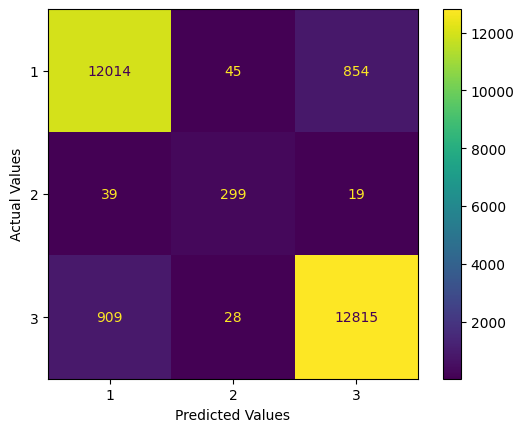

In [13]:
cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

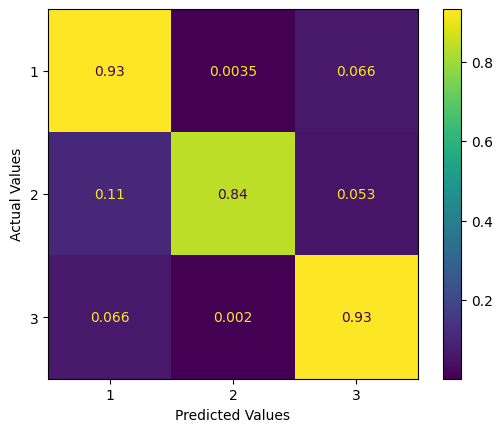

In [14]:
cmd_norm = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels=['1', '2', '3'])
cmd_norm.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [15]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93     12913
           0       0.80      0.84      0.82       357
           1       0.94      0.93      0.93     13752

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



Tune the RF model

In [16]:
for m in range(1,51):
    model = RandomForestClassifier(n_estimators=1000, max_depth=m, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {m} max_depth is:{accuracy}")

Accuracy for 1 max_depth is:0.6841520954759922
Accuracy for 2 max_depth is:0.6744379683597003
Accuracy for 3 max_depth is:0.6525673050235915
Accuracy for 4 max_depth is:0.6389305208622444
Accuracy for 5 max_depth is:0.6513831066703673
Accuracy for 6 max_depth is:0.6699602183365714
Accuracy for 7 max_depth is:0.7019150707743547
Accuracy for 8 max_depth is:0.725728559533722
Accuracy for 9 max_depth is:0.7532611712461837
Accuracy for 10 max_depth is:0.7813858821352576
Accuracy for 11 max_depth is:0.8112313812563604
Accuracy for 12 max_depth is:0.8372097326302156
Accuracy for 13 max_depth is:0.8652049218244056
Accuracy for 14 max_depth is:0.8896475159589231
Accuracy for 15 max_depth is:0.9117032102877232
Accuracy for 16 max_depth is:0.9262281432139884
Accuracy for 17 max_depth is:0.9350356184660931
Accuracy for 18 max_depth is:0.9391433065038394
Accuracy for 19 max_depth is:0.9404570265519474
Accuracy for 20 max_depth is:0.9394393560921455
Accuracy for 21 max_depth is:0.9381811453418447
Ac

https://github.com/ngoix/scikit-learn/commit/2661da0d3578eda406dcf1867443d9f744165c5f

C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


2 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


4 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


6 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


8 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


11 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


12 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


14 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


15 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


16 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


18 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


19 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


20 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


21 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


22 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


23 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


24 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


26 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


27 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


28 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


29 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


31 RandomForestClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


32 RandomForestClassifier (max_features='auto')
33 RandomForestClassifier (max_features='auto')
34 RandomForestClassifier (max_features='auto')
35 RandomForestClassifier (max_features='auto')
36 RandomForestClassifier (max_features='auto')
37 RandomForestClassifier (max_features='auto')
38 RandomForestClassifier (max_features='auto')
39 RandomForestClassifier (max_features='auto')
40 RandomForestClassifier (max_features='auto')
41 RandomForestClassifier (max_features='auto')
42 RandomForestClassifier (max_features='auto')
43 RandomForestClassifier (max_features='auto')
44 RandomForestClassifier (max_features='auto')
45 RandomForestClassifier (max_features='auto')
46 RandomForestClassifier (max_features='auto')
47 RandomForestClassifier (max_features='auto')
48 RandomForestClassifier (max_features='auto')
49 RandomForestClassifier (max_features='auto')
50 RandomForestClassifier (max_features='auto')
51 RandomForestClassifier (max_features='auto')
52 RandomForestClassifier (max_features=

C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


2 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


4 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


6 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


8 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


11 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


12 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


14 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


15 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


16 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


18 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


19 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


20 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


21 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


22 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


23 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


24 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


26 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


27 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


28 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


29 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


31 RandomForestClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


32 RandomForestClassifier (max_features='sqrt')
33 RandomForestClassifier (max_features='sqrt')
34 RandomForestClassifier (max_features='sqrt')
35 RandomForestClassifier (max_features='sqrt')
36 RandomForestClassifier (max_features='sqrt')
37 RandomForestClassifier (max_features='sqrt')
38 RandomForestClassifier (max_features='sqrt')
39 RandomForestClassifier (max_features='sqrt')
40 RandomForestClassifier (max_features='sqrt')
41 RandomForestClassifier (max_features='sqrt')
42 RandomForestClassifier (max_features='sqrt')
43 RandomForestClassifier (max_features='sqrt')
44 RandomForestClassifier (max_features='sqrt')
45 RandomForestClassifier (max_features='sqrt')
46 RandomForestClassifier (max_features='sqrt')
47 RandomForestClassifier (max_features='sqrt')
48 RandomForestClassifier (max_features='sqrt')
49 RandomForestClassifier (max_features='sqrt')
50 RandomForestClassifier (max_features='sqrt')
51 RandomForestClassifier (max_features='sqrt')
52 RandomForestClassifier (max_features=

C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


2 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


4 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


6 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


8 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


11 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


12 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


14 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


15 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


16 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


18 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


19 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


20 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


21 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


22 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


23 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


24 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


26 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


27 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


28 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


29 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


31 ExtraTreesClassifier (max_features='auto')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


32 ExtraTreesClassifier (max_features='auto')
33 ExtraTreesClassifier (max_features='auto')
34 ExtraTreesClassifier (max_features='auto')
35 ExtraTreesClassifier (max_features='auto')
36 ExtraTreesClassifier (max_features='auto')
37 ExtraTreesClassifier (max_features='auto')
38 ExtraTreesClassifier (max_features='auto')
39 ExtraTreesClassifier (max_features='auto')
40 ExtraTreesClassifier (max_features='auto')
41 ExtraTreesClassifier (max_features='auto')
42 ExtraTreesClassifier (max_features='auto')
43 ExtraTreesClassifier (max_features='auto')
44 ExtraTreesClassifier (max_features='auto')
45 ExtraTreesClassifier (max_features='auto')
46 ExtraTreesClassifier (max_features='auto')
47 ExtraTreesClassifier (max_features='auto')
48 ExtraTreesClassifier (max_features='auto')
49 ExtraTreesClassifier (max_features='auto')
50 ExtraTreesClassifier (max_features='auto')
51 ExtraTreesClassifier (max_features='auto')
52 ExtraTreesClassifier (max_features='auto')
53 ExtraTreesClassifier (max_featu

C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


2 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


4 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


6 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


8 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


11 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


12 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


14 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


15 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


16 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


18 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


19 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


20 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


21 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


22 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


23 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


24 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


26 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


27 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


28 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


29 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


31 ExtraTreesClassifier (max_features='sqrt')


C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


32 ExtraTreesClassifier (max_features='sqrt')
33 ExtraTreesClassifier (max_features='sqrt')
34 ExtraTreesClassifier (max_features='sqrt')
35 ExtraTreesClassifier (max_features='sqrt')
36 ExtraTreesClassifier (max_features='sqrt')
37 ExtraTreesClassifier (max_features='sqrt')
38 ExtraTreesClassifier (max_features='sqrt')
39 ExtraTreesClassifier (max_features='sqrt')
40 ExtraTreesClassifier (max_features='sqrt')
41 ExtraTreesClassifier (max_features='sqrt')
42 ExtraTreesClassifier (max_features='sqrt')
43 ExtraTreesClassifier (max_features='sqrt')
44 ExtraTreesClassifier (max_features='sqrt')
45 ExtraTreesClassifier (max_features='sqrt')
46 ExtraTreesClassifier (max_features='sqrt')
47 ExtraTreesClassifier (max_features='sqrt')
48 ExtraTreesClassifier (max_features='sqrt')
49 ExtraTreesClassifier (max_features='sqrt')
50 ExtraTreesClassifier (max_features='sqrt')
51 ExtraTreesClassifier (max_features='sqrt')
52 ExtraTreesClassifier (max_features='sqrt')
53 ExtraTreesClassifier (max_featu

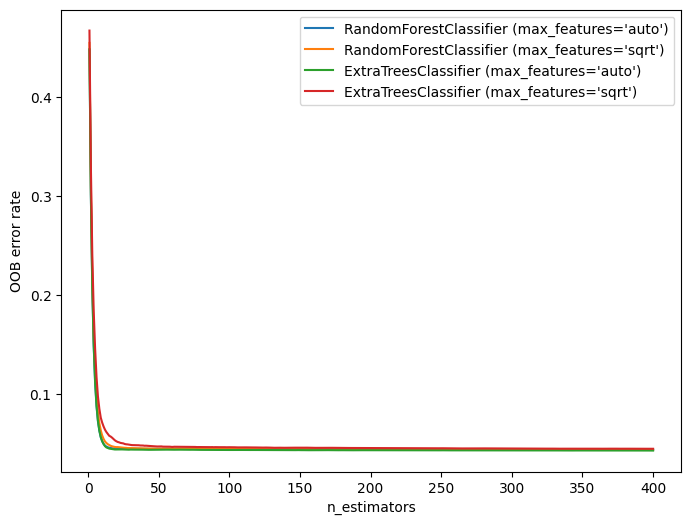

In [17]:

import pylab

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RANDOM_STATE = 7

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for paralellised ensembles but is necessary for tracking the OOB
# error trajectory during training.
clfs = [
    ("RandomForestClassifier (max_features='auto')",
        RandomForestClassifier(warm_start=True, oob_score=True, max_features=None,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier (max_features='sqrt')",
        RandomForestClassifier(warm_start=True, max_features="sqrt", 
                               oob_score=True, random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier (max_features='auto')",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                             oob_score=True, bootstrap=True,
                             random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier (max_features='sqrt')",
        ExtraTreesClassifier(warm_start=True, max_features="sqrt",
                             oob_score=True, bootstrap=True,
                             random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in clfs)

# Max no. of estimators to use in each ensemble.
n_estimators = 400

for label, clf in clfs:
    for i in range(1, n_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        print(i, label)

        # Record the <error rate> for each <n_estimators> setting. 
        error_rate[label].append((i, 1 - clf.oob_score_))

# Generate the "OOB error rate" vs. "no. of estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    pylab.plot(xs, ys, label=label)

pylab.xlabel("n_estimators")
pylab.ylabel("OOB error rate")
pylab.legend(loc="upper right")
pylab.gcf().set_size_inches(8, 6)
pylab.show()

In [18]:
best_accuracy = 0
Depth = []
Acc = []
for m in range(1,51):
    Depth.append(m)

    model = RandomForestClassifier(n_estimators=100, max_depth=m, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    Acc.append(accuracy)

    if accuracy> best_accuracy:
        best_accuracy = accuracy
        best_depth = m
    print(f"Accuracy for {m} max_depth is:{accuracy}")
list_of_tuples = list(zip(Depth, Acc))
df = pd.DataFrame(list_of_tuples, columns=['Depth', 'Accuracy'])

print(f"Best accuracy is: {best_accuracy} and depth is {best_depth}")
    

Accuracy for 1 max_depth is:0.6840410768803774
Accuracy for 2 max_depth is:0.6628180220186881
Accuracy for 3 max_depth is:0.6460727171801277
Accuracy for 4 max_depth is:0.637709316310482
Accuracy for 5 max_depth is:0.6534184475899714
Accuracy for 6 max_depth is:0.6702377648256083
Accuracy for 7 max_depth is:0.6965306688870386
Accuracy for 8 max_depth is:0.7262466463132574
Accuracy for 9 max_depth is:0.7529836247571469
Accuracy for 10 max_depth is:0.7790729947266167
Accuracy for 11 max_depth is:0.8098436488111759
Accuracy for 12 max_depth is:0.8400962161161994
Accuracy for 13 max_depth is:0.8641317420667962
Accuracy for 14 max_depth is:0.888759367194005
Accuracy for 15 max_depth is:0.9100379313535018
Accuracy for 16 max_depth is:0.924877416967342
Accuracy for 17 max_depth is:0.9336293829216393
Accuracy for 18 max_depth is:0.9385142011286891
Accuracy for 19 max_depth is:0.9401239707651031
Accuracy for 20 max_depth is:0.9392728281987233
Accuracy for 21 max_depth is:0.9379035988528078
Accu

<Axes: xlabel='Depth'>

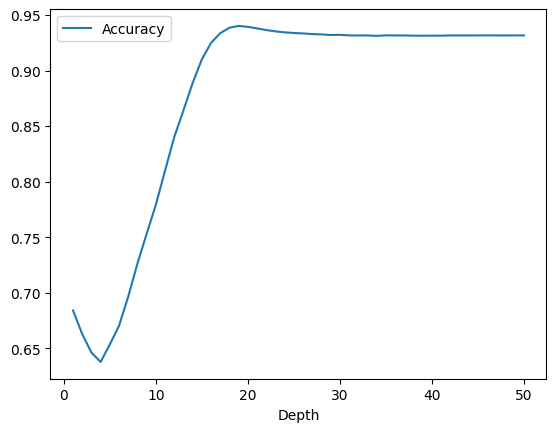

In [19]:
df
df.plot(x='Depth', y='Accuracy', kind="line")

Use the tuned hyperparameters for a new RF

1st - Manually tuned using a validation set

In [20]:
rnd_clf_tweaked_man = RandomForestClassifier(n_estimators=100, max_depth=19, n_jobs=-1, random_state=7)
rnd_clf_tweaked_man.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_jobs=-1, random_state=7)

In [21]:
rnd_clf_tweaked_man_train_score = rnd_clf_tweaked_man.score(X_train, y_train)
rnd_clf_tweaked_man_test_score = rnd_clf_tweaked_man.score(X_test, y_test)
print("Training score:", rnd_clf_tweaked_man_train_score)
print("Testing score:", rnd_clf_tweaked_man_test_score )

Training score: 0.9746529139948826
Testing score: 0.9364961882910221


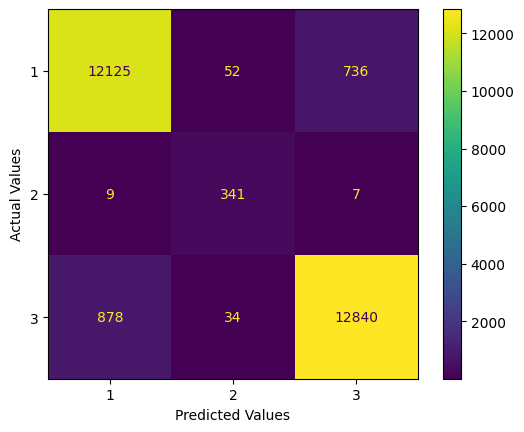

In [22]:
y_tweaked_man_pred_rf = rnd_clf_tweaked_man.predict(X_test)

cm = confusion_matrix(y_test, y_tweaked_man_pred_rf, labels=rnd_clf_tweaked_man.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])
cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

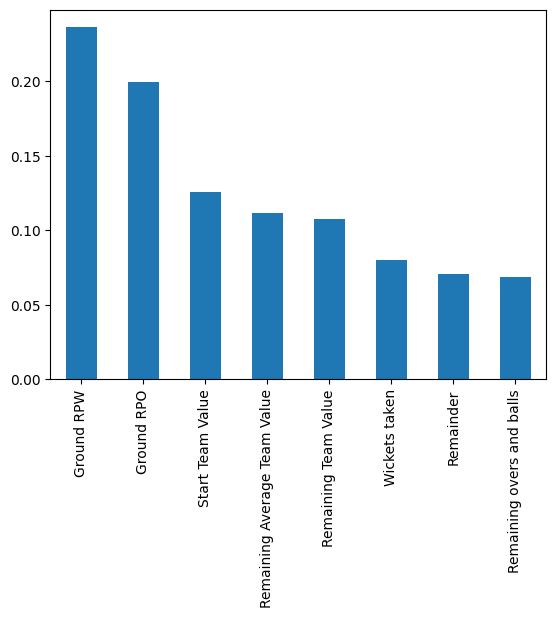

In [23]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rnd_clf_tweaked_man.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [24]:
sdfsdf

NameError: name 'sdfsdf' is not defined

2nd - Tweak with CV version

In [ ]:
rnd_clf_tweaked_CV = RandomForestClassifier(n_estimators=100, max_depth=19, n_jobs=-1, random_state=7)
rnd_clf_tweaked_CV.fit(X_train, y_train)

In [ ]:
rnd_clf_tweaked_CV_train_score = rnd_clf_tweaked_CV.score(X_train, y_train)
rnd_clf_tweaked_CV_test_score = rnd_clf_tweaked_CV.score(X_test, y_test)
print("Training score:", rnd_clf_tweaked_CV_train_score)
print("Testing score:", rnd_clf_tweaked_CV_test_score )

In [ ]:
y_tweaked_CV_pred_rf = rnd_clf_tweaked_CV.predict(X_test)

cm = confusion_matrix(y_test, y_tweaked_CV_pred_rf, labels=rnd_clf_tweaked_CV.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])
cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rnd_clf_tweaked_CV.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

https://www.datacamp.com/tutorial/random-forests-classifier-python